# Order Fulfillment Analysis

As a data analyst at Terpazon.com, the purpose of this notebook is to provide insights to the company using data to further maximize profit. We will first load the B2C and B2B transaction data into dataframes and use simple analysis processes to receive a brief overview of what the data looks like from afar. After, we will augment and filter the data in order to examine various information about specific order queries with conditions. Finally, we will use descriptive statistics to determine profitability of the numerous orders followed by the creation of a data visualization to depict the top ten states with the most orders.

In order to analyze the data using dataframes, import the Numpy and Pandas libraries to load the csv data into dataframes for further analysis. Also, import the Matplotlib library for later using when creating graphs as a means to visualize the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Initial Data Load

Find the amount of orders in the dataframe and briefly examine the top twenty orders with the highest total profits.

In [2]:
# Load data from csv file into a Pandas dataframe with order ID as the index for further analysis
imported_orders = pd.read_csv('HW3-order-fulfillment.csv', index_col=0)
imported_orders

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


The imported customer order dataset provides all indexes which are sorted by order ID and columns that are sorted into different categories describing the orders.

In [3]:
# Output to visualize the numer of orders
print(f'{len(imported_orders)} is the amount of orders that have been loaded')

9994 is the amount of orders that have been loaded


In [4]:
# Provide orders including all known data about the top twenty most profitable orders
imported_orders.sort_values(by="Profit", ascending=False).head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,
6827,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8154,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4191,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9040,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4099,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
2624,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
510,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
8489,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
7667,Standard Class,Home Office,United States,Providence,Rhode Island,2908,East,Technology,Copiers,5399.910,9,0.0,2591.9568


Given the information about about the top twenty orders with the highest profit, we can now procede with more in-depth analyses regarding profits under varying conditions

## Data Augmentation and Filtration

In order to provide further insight into profit for the numerous orders, we will create and populate a new column to calculate the profit per unit sold for each order. The addition will help to obtain a greater sense of how to further interpret the data related to profits.

In [5]:
# Add the profit per unit sold column and sort the top ten highest losses per unit per order to get a better sense of what type of transactions are least favorable
imported_orders['Profit Per Unit Sold'] = imported_orders['Profit'] / imported_orders['Quantity']
imported_orders.sort_values("Profit Per Unit Sold").head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Per Unit Sold
Order ID,,,,,,,,,,,,,,
3152,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912,-1319.9956
7773,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780,-1319.9956
684,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904,-959.9976
3012,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800,-679.9960
4992,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845,-585.8969
9775,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928,-462.7366
1200,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464,-462.7366
5311,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820,-381.2970
2847,Standard Class,Home Office,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,762.594,3,0.8,-1143.8910,-381.2970


To find dataframes with varying conditions, we must create a function that will allow us to use different values for conditions that will allow us to output information such as the top seven orders, top ten orders in Maryland, top twenty orders shipped to consumers, and top five orders shipped to the zip code 20852.

In [6]:
# Use function for future analysis on various conditions for top profit orders
def top_profit_orders(df, col=None, value=None, number_rows=15):
    if col != None and value != None:
        user_filter = df[df[col] == value]
        return user_filter.sort_values("Profit", ascending=False).head(number_rows)
    else:
        return df.sort_values("Profit", ascending=False).head(number_rows)

Top seven orders:

In [7]:
top_profit_orders(imported_orders, number_rows=7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Per Unit Sold
Order ID,,,,,,,,,,,,,,
6827,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,1679.9952
8154,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,1679.9952
4191,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,1679.9952
9040,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,380.4900
4099,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,926.0951
2624,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,979.9972
510,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,635.4950


Top ten orders in Maryland:

In [8]:
top_profit_orders(imported_orders, col="State", value="Maryland", number_rows=10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Per Unit Sold
Order ID,,,,,,,,,,,,,,
7281,Standard Class,Consumer,United States,Columbia,Maryland,21044,East,Office Supplies,Binders,2541.98,2,0.0,1270.9900,635.4950
3184,Second Class,Corporate,United States,Columbia,Maryland,21044,East,Office Supplies,Storage,1633.14,9,0.0,473.6106,52.6234
7766,Same Day,Corporate,United States,Columbia,Maryland,21044,East,Furniture,Chairs,1779.90,5,0.0,373.7790,74.7558
3183,Second Class,Corporate,United States,Columbia,Maryland,21044,East,Technology,Accessories,826.62,3,0.0,355.4466,118.4822
3733,Standard Class,Corporate,United States,Clinton,Maryland,20735,East,Technology,Phones,1259.93,7,0.0,327.5818,46.7974
4401,Same Day,Consumer,United States,Columbia,Maryland,21044,East,Office Supplies,Appliances,901.95,3,0.0,297.6435,99.2145
4247,Standard Class,Home Office,United States,Baltimore,Maryland,21215,East,Furniture,Furnishings,1049.20,5,0.0,272.7920,54.5584
4402,Same Day,Consumer,United States,Columbia,Maryland,21044,East,Furniture,Furnishings,971.50,5,0.0,252.5900,50.5180
7184,First Class,Consumer,United States,Baltimore,Maryland,21215,East,Furniture,Chairs,908.82,9,0.0,227.2050,25.2450


Top twenty orders shipped to consumers:

In [9]:
top_profit_orders(imported_orders, col="Segment", value="Consumer", number_rows=20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Per Unit Sold
Order ID,,,,,,,,,,,,,,
8154,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,1679.9952
4191,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,1679.9952
9040,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,380.4900
4099,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,926.0951
510,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,635.4950
8489,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,559.9968
6521,Second Class,Consumer,United States,Jackson,Michigan,49201,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216,626.0554
1086,Standard Class,Consumer,United States,Yonkers,New York,10701,East,Technology,Machines,4899.930,7,0.0,2400.9657,342.9951
6627,Standard Class,Consumer,United States,New York City,New York,10024,East,Technology,Machines,6999.960,4,0.0,2239.9872,559.9968


Top five orders shipped to the zip code 20852:

In [10]:
top_profit_orders(imported_orders, col="Postal Code", value=20852, number_rows=5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Per Unit Sold
Order ID,,,,,,,,,,,,,,
1178,Standard Class,Consumer,United States,Rockville,Maryland,20852,East,Furniture,Chairs,172.50,2,0.0,51.7500,25.8750
1179,Standard Class,Consumer,United States,Rockville,Maryland,20852,East,Technology,Phones,179.97,3,0.0,44.9925,14.9975
9068,Standard Class,Consumer,United States,Rockville,Maryland,20852,East,Technology,Phones,90.48,2,0.0,23.5248,11.7624
8189,Second Class,Consumer,United States,Rockville,Maryland,20852,East,Office Supplies,Paper,19.44,3,0.0,9.3312,3.1104
8190,Second Class,Consumer,United States,Rockville,Maryland,20852,East,Office Supplies,Binders,7.38,1,0.0,3.6162,3.6162


## Data Analysis

First we will use descriptive statistics to get a general sense of the data using methods such as minimum, maximum, mean, and median for profit values. Next, we will determine whether or not Terpazon.com has at least 85% of their orders be profitable. We will also find which three sub-categories contained the largest percentages of orders as well as the total percentage of all three sub-categories combined. Finally, we will make a recommendation as to what region the company should build their next warehouse based on the customer transaction data provided.

### Profitability

Use various metrics to determine the profitability measures across Terpazon.com.

In [11]:
# Display descriptive statistics for profits of all orders for further analysis
print(f'The order with the highest loss is ${imported_orders["Profit"].min():.2f}')
print(f'The order with the highest profit is ${imported_orders["Profit"].max():.2f}')
print(f'The average profit of all of the orders is ${imported_orders["Profit"].mean():.2f}')
print(f'The median profit of all of the order is ${imported_orders["Profit"].median():.2f}')

The order with the highest loss is $-6599.98
The order with the highest profit is $8399.98
The average profit of all of the orders is $28.66
The median profit of all of the order is $8.67


In [12]:
# Output what percentage of orders are profitable or not
profitable, unprofitable =(imported_orders['Profit'] > 0).value_counts()
print(f'The total percentage of profitable orders is {(profitable/len(imported_orders))*100:,.2f}%')
print(f'Therefore, the total percentage of unprofitable orders is {(unprofitable/len(imported_orders))*100:,.2f}%')

The total percentage of profitable orders is 80.63%
Therefore, the total percentage of unprofitable orders is 19.37%


#### Analysis:

The goal of reaching a positive profitabilty  percentage of 85% has not been met as only around 80.63% of orders are profitable.

### Three Sub-Categories With Largest Order Pools

Find the three sub-categories with the largest order pools to determine the most popular products at Terpazon.com.

In [13]:
# Display the sub-categories percentage of total orders
print(f'The top three sub-categories as a percent is: \n{((imported_orders["Sub-Category"].value_counts()[0:3])/len(imported_orders)*100)}') 

The top three sub-categories as a percent is: 
Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Name: Sub-Category, dtype: float64


In [14]:
print(f'The total percentage of the top three orders sub-categories across all orders is: \n{(sum((imported_orders["Sub-Category"].value_counts()[0:3]))/len(imported_orders)*100):,.2f}%')

The total percentage of the top three orders sub-categories across all orders is: 
38.52%


#### Analysis:

As provided by the information above, the three sub-categories with the most orders are binders with about 15.24%, paper with about 13.71%, and furnishings with about 9.58%. The sum of these top three sub-category percents are about 38.52%, implying that these three sub-categories make up over a third of all orders.

### Warehouse Region Recommendation

Use data such as the highest sales, profits, and quantity of orders to determine where to build the first Terpazon.com warehouse

In [15]:
# Find which region has the highest sales in order from greatest to least
imported_orders.groupby("Region").Sales.sum().sort_values(ascending=False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [16]:
# Find which region has the highest profits in order from greatest to least
imported_orders.groupby("Region").Profit.sum().sort_values(ascending=False)

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

In [17]:
# Find which region has the highest qunatity of orders from greatest to least
imported_orders.groupby("Region").Quantity.sum().sort_values(ascending=False)

Region
West       12266
East       10618
Central     8780
South       6209
Name: Quantity, dtype: int64

#### Analysis:

In an effort to cut outsourcing costs, building a new warehouse near the most profitable region would be the most ideal way to meet this goal as the transportation of orders will be minimized due to shorter travel distances. Using the data regarding which region has the highest sales, highest profits, and highest quantity of orders, the West region is the clear answer as the west scores highest in all measures. Therefore, the most suitable reccomendation for Terpazon.com to cut outsourcing costs would be to build their first warehouse in the west. 

## Data Visualization

Find the number of orders of the top ten states with the most orders and use a bar graph to plot the data.

In [18]:
# Determine number of orders per state in each of the top ten states
imported_orders_states = imported_orders['State'].value_counts()[0:10].to_frame()
imported_orders_states

,State
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255
North Carolina,249


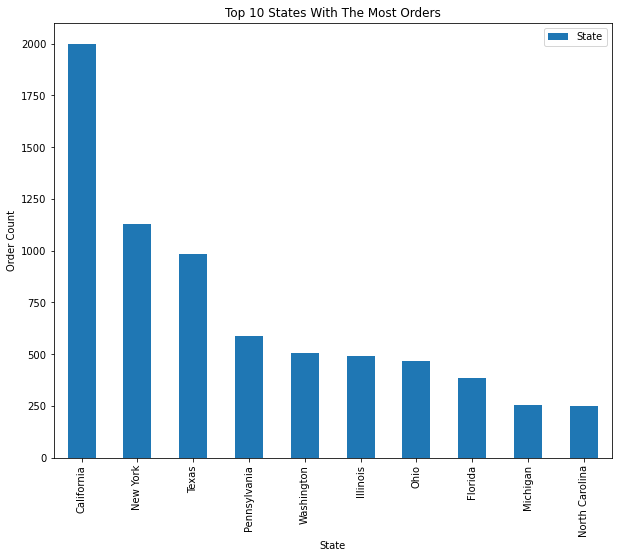

In [19]:
# Use a bar graph for categorical values for states as the x-axis and count of each as the y-axis
imported_orders_states.plot(kind='bar', y='State', figsize=(10, 8))
plt.title('Top 10 States With The Most Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.show()

### Analysis:

From the data visualization of the top ten states with the most orders, the top three states, California, New York, and Texas, are likely to be at the top due to the fact that these states also have the highest populations of people. As a result, the states with the most people will order the most products.

"I pledge on my honor that I have not given nor received any unauthorized
assistance on this assignment."
-- John Yannone